In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
data=pd.read_csv('job-market-sample-data.csv')

In [3]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


## Company Based Analysis

In [4]:
data['company'].value_counts().head(10)

Indian Institute of Technology Bombay           403
Confidential                                    393
National Institute of Industrial Engineering    185
Oracle India Pvt. Ltd.                          151
JPMorgan Chase                                  135
Godrej Industries Ltd                           125
Unitforce technologies Pvt. Ltd.                100
Capgemini                                        98
HCL Technologies                                 95
Axis Jobs                                        92
Name: company, dtype: int64

<AxesSubplot:>

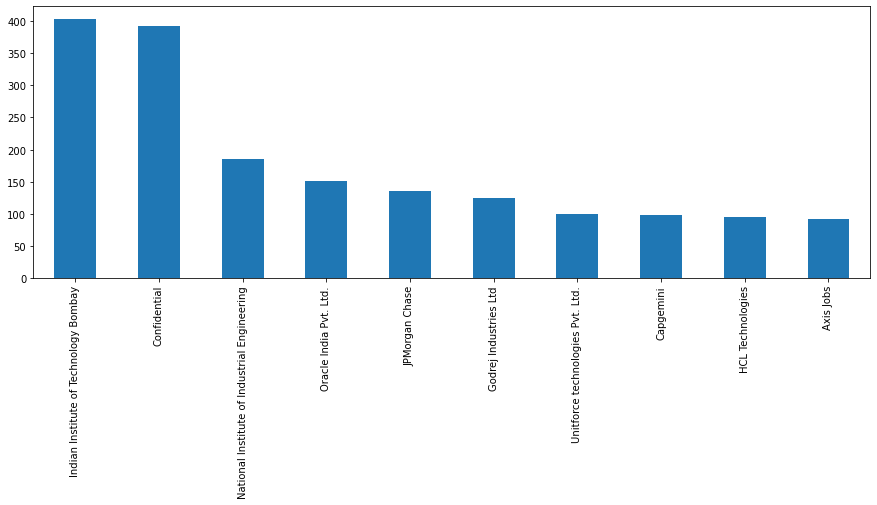

In [5]:
f,ax=plt.subplots(figsize=(15,5))
data['company'].value_counts().head(10).plot(kind = 'bar')

The comapny name Confidential are Recruiting Agency

## Industry Based Analysis

In [6]:
data['industry'].value_counts().head(10)

IT-Software / Software Services                  9216
Education / Teaching / Training                  1322
BPO / Call Centre / ITES                         1254
Banking / Financial Services / Broking           1238
Recruitment / Staffing                           1129
Internet / Ecommerce                              738
Pharma / Biotech / Clinical Research              525
Medical / Healthcare / Hospitals                  495
Automobile / Auto Anciliary / Auto Components     478
Construction / Engineering / Cement / Metals      449
Name: industry, dtype: int64

<AxesSubplot:>

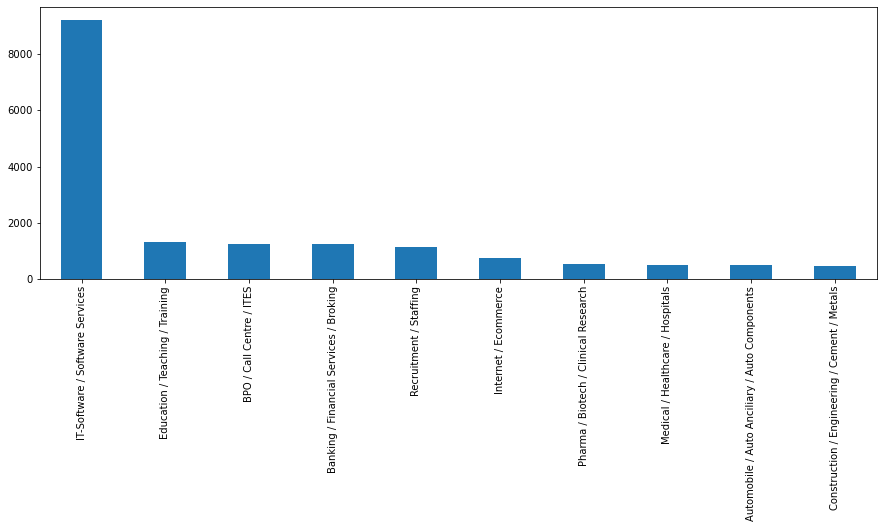

In [7]:
f,ax=plt.subplots(figsize=(15,5))
data['industry'].value_counts().head(10).plot(kind = 'bar')

Software Services biggest  industry in India, So it have the highest job opportunity



![](https://www.sumasoft.com/wp-content/uploads/2016/05/Budget-friendly-Software-Services.jpg)

## Jobtitle Analysis

In [8]:
data['jobtitle'].value_counts().head(10)

Business Development Executive    93
Business Development Manager      92
Software Engineer                 81
Project Manager                   67
Android Developer                 65
Web Designer                      61
Content Writer                    59
Senior Software Engineer          58
Sales Executive                   56
PHP Developer                     54
Name: jobtitle, dtype: int64

<AxesSubplot:>

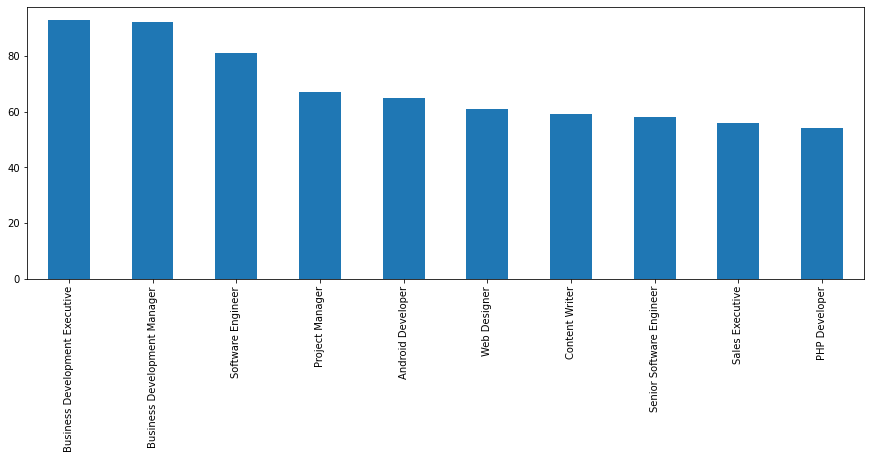

In [9]:
f,ax=plt.subplots(figsize=(15,5))
data['jobtitle'].value_counts().head(10).plot(kind = 'bar')

Business Development and Software Engineer are the higest occurring jobtitle


## Skills Analysis

In [10]:
data['skills'].value_counts().head(10)

IT Software - Application Programming    5989
Sales                                    2893
ITES                                     1640
Teaching                                 1091
HR                                        928
Marketing                                 868
Accounts                                  860
Production                                667
Medical                                   418
Financial Services                        413
Name: skills, dtype: int64

<AxesSubplot:>

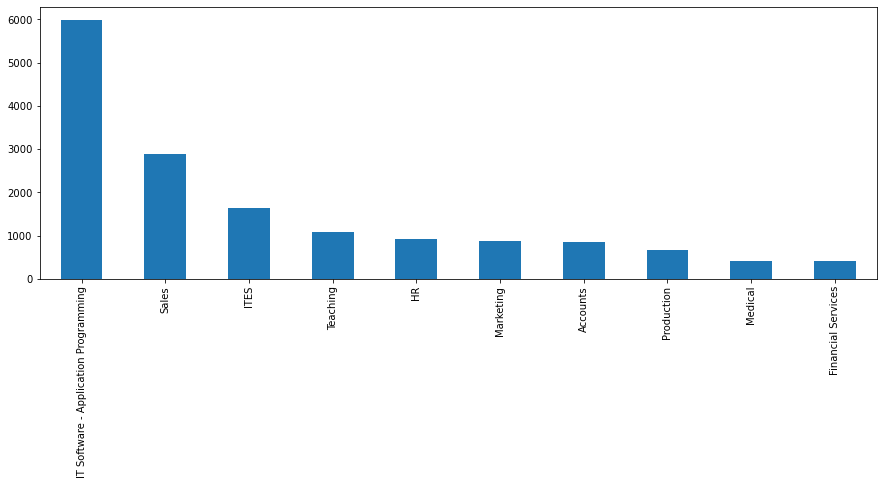

In [11]:
f,ax=plt.subplots(figsize=(15,5))
data['skills'].value_counts().head(10).plot(kind = 'bar')

IT Software - Application Programming  is highly demanded skill

![](https://www.idgconnect.com/IMG/777/49777/shutterstock-10338536170938-620x354.jpg?1520919148)

In [12]:
replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)': 'Bangalore',
      r'Bengaluru': 'Bangalore',
      r'Hyderabad / Secunderabad': 'Hyderabad',
      r'Mumbai , Mumbai': 'Mumbai',
      r'Noida': 'NCR',
      r'Delhi': 'NCR',
      r'Gurgaon': 'NCR', 
      r'Delhi/NCR(National Capital Region)': 'NCR',
      r'Delhi , Delhi': 'NCR',
      r'Noida , Noida/Greater Noida': 'NCR',
      r'Ghaziabad': 'NCR',
      r'Delhi/NCR(National Capital Region) , Gurgaon': 'NCR',
      r'NCR , NCR': 'NCR',
      r'NCR/NCR(National Capital Region)': 'NCR',
      r'NCR , NCR/Greater NCR': 'NCR',
      r'NCR/NCR(National Capital Region) , NCR': 'NCR', 
      r'NCR , NCR/NCR(National Capital Region)': 'NCR', 
      r'Bangalore , Bangalore / Bangalore': 'Bangalore',
      r'Bangalore , karnataka': 'Bangalore',
      r'NCR/NCR(National Capital Region)': 'NCR',
      r'NCR/Greater NCR': 'NCR',
      r'NCR/NCR(National Capital Region) , NCR': 'NCR'
       
   }
}

data.replace(replacements, regex=True, inplace=True)
y = data['joblocation_address'].value_counts()

<AxesSubplot:>

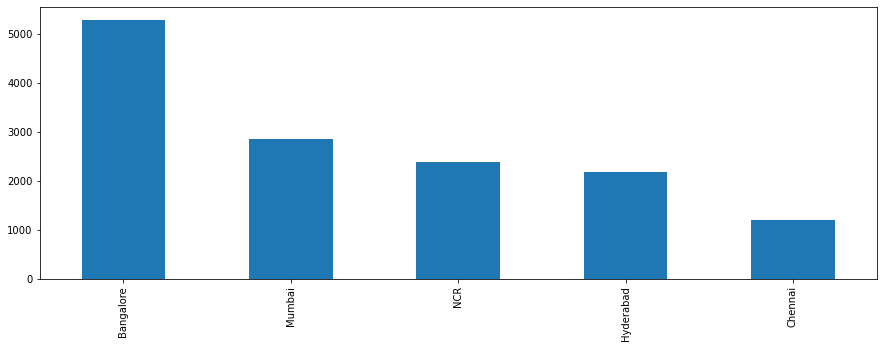

In [13]:
most_job_posting_city=data['joblocation_address'].value_counts().head()
f ,ax=plt.subplots(figsize=(15,5))
most_job_posting_city.plot(kind = 'bar')

Bangalore have higest job posting and it is th IT capital of India

## Spliting payrate into min_pay and max_pay

In [14]:
pay_split = data['payrate'].str[1:-1].str.split('-', expand=True)
pay_split.head()


,0,1,2,3,4,5,6
0,",50,000","2,25,000 P.",None,None,None,None,None
1,",50,000","2,50,000 P.A. 2000",None,None,None,None,None
2,ot Disclosed by Recruite,None,None,None,None,None,None
3,ot Disclosed by Recruite,None,None,None,None,None,None
4,ot Disclosed by Recruite,None,None,None,None,None,None


In [15]:
#remove space in left and right 
pay_split[0] =  pay_split[0].str.strip()
#remove comma 
pay_split[0] = pay_split[0].str.replace(',', '')
#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
pay_split[0] = pay_split[0].str.replace(r'\D.*', '')
#display 
pay_split[0].head()

0    50000
1    50000
2         
3         
4         
Name: 0, dtype: object

In [16]:
#remove space in left and right 
pay_split[1] =  pay_split[1].str.strip()
#remove comma 
pay_split[1] = pay_split[1].str.replace(',', '')
#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
pay_split[1] = pay_split[1].str.replace(r'\D.*', '')
#display 
pay_split[1].head()

0    225000
1    250000
2      None
3      None
4      None
Name: 1, dtype: object

In [17]:
pay_split[0] = pd.to_numeric(pay_split[0], errors='coerce')
pay_split[1] = pd.to_numeric(pay_split[1], errors='coerce')

In [18]:
pay=pd.concat([pay_split[0], pay_split[1]], axis=1, sort=False)

In [19]:
pay.rename(columns={0:'min_pay', 1:'max_pay'}, inplace=True)
pay.head()

,min_pay,max_pay
0,50000.0,225000.0
1,50000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [20]:
data=pd.concat([data, pay], axis=1, sort=False)

In [21]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,50000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,50000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN


Spliting experience into min_experience and max_experience

In [22]:
experience_split = data['experience'].str[0:-1].str.split('-', expand=True)
experience_split.head()

,0,1,2
0,0,1 yr,None
1,0,0 yr,None
2,4,8 yr,None
3,11,15 yr,None
4,6,8 yr,None


In [23]:
#remove space in left and right 
experience_split[1] =  experience_split[1].str.strip()
#remove comma 
experience_split[1] = experience_split[1].str.replace('yr', '')
#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[1] = experience_split[1].str.replace(r'yr', '')
#display 
experience_split[1].head()

0     1 
1     0 
2     8 
3    15 
4     8 
Name: 1, dtype: object

In [24]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')

In [25]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)

In [26]:
experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

,min_experience,max_experience
0,0.0,1.0
1,0.0,0.0
2,4.0,8.0
3,11.0,15.0
4,6.0,8.0


In [27]:
data=pd.concat([data, experience], axis=1, sort=False)
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_experience,max_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,50000.0,225000.0,0.0,1.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,50000.0,250000.0,0.0,0.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0


In [28]:
data['avg_pay']=(data['min_pay'].values + data['max_pay'].values)/2
data['avg_experience']=(data['min_experience'].values + data['max_experience'].values)/2

<AxesSubplot:xlabel='min_experience', ylabel='min_pay'>

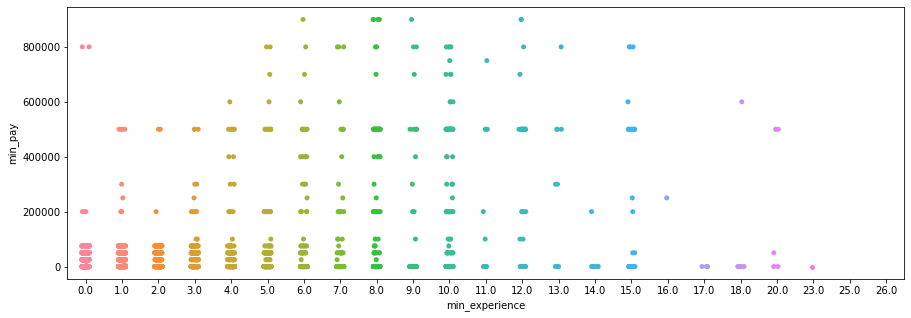

In [29]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='min_experience', y='min_pay', data=data, jitter=True)

<AxesSubplot:xlabel='min_experience', ylabel='min_pay'>

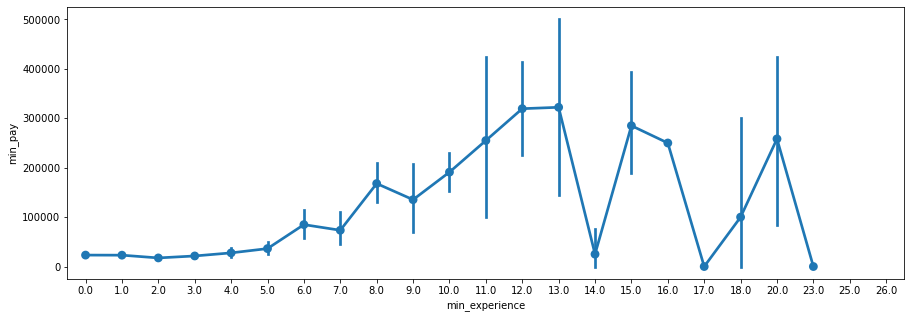

In [30]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='min_experience', y='min_pay', data=data)

<AxesSubplot:xlabel='max_experience', ylabel='max_pay'>

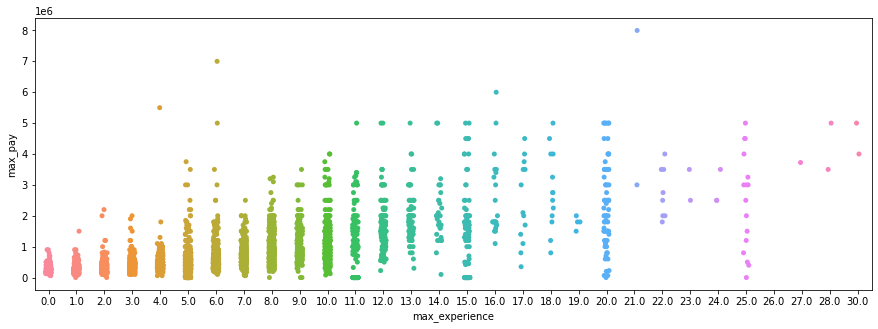

In [31]:
f,ax=plt.subplots(figsize=(15,5))
sns.stripplot(x='max_experience', y='max_pay', data=data, jitter=True)

<AxesSubplot:xlabel='max_experience', ylabel='max_pay'>

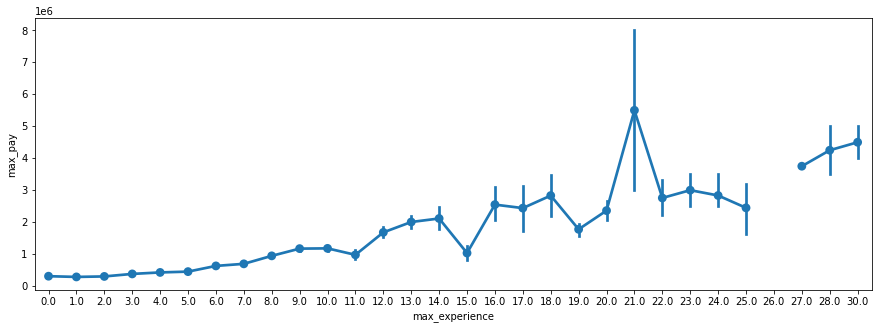

In [32]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='max_experience', y='max_pay', data=data)

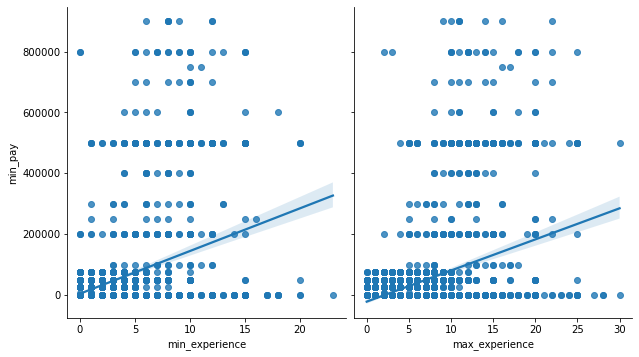

In [33]:
sns.pairplot(data, 
             size=5, aspect=0.9, 
             x_vars=["min_experience","max_experience"],
             y_vars=["min_pay"],
             kind="reg")

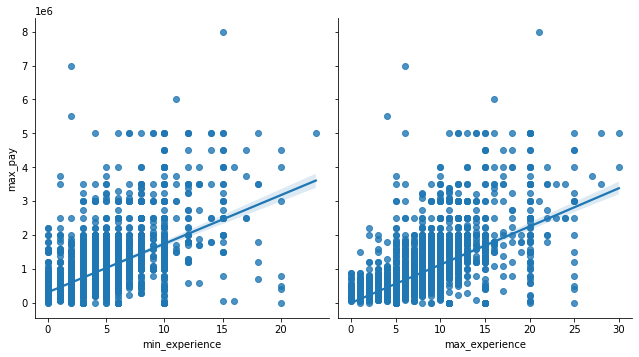

In [34]:
sns.pairplot(data, 
             size=5, aspect=0.9, 
             x_vars=["min_experience","max_experience"],
             y_vars=["max_pay"],
             kind="reg")

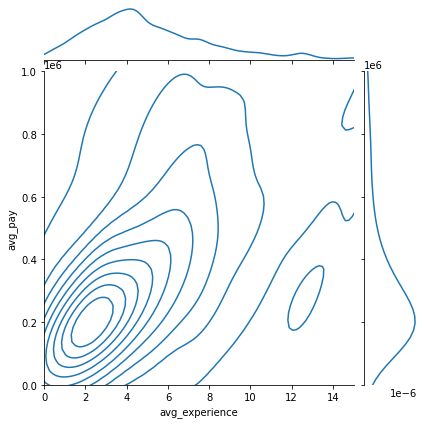

In [35]:
sns.jointplot(x='avg_experience', y='avg_pay', data=data, 
              kind="kde",xlim={0,15}, ylim={0,1000000})

<AxesSubplot:xlabel='avg_experience', ylabel='avg_pay'>

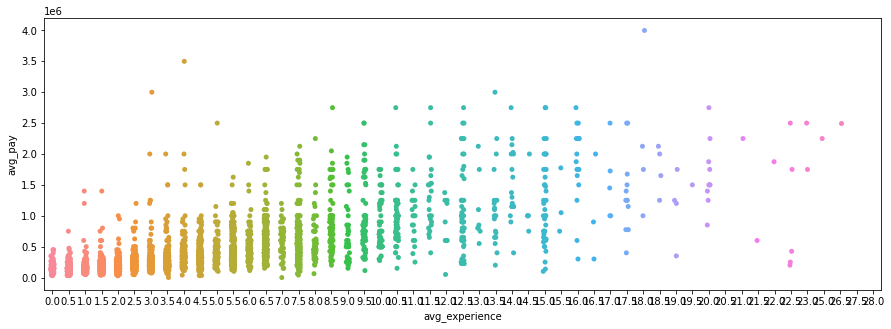

In [36]:
f,ax=plt.subplots(figsize=(15,5))
sns.stripplot(x='avg_experience', y='avg_pay', data=data, jitter=True)

<AxesSubplot:xlabel='avg_experience', ylabel='avg_pay'>

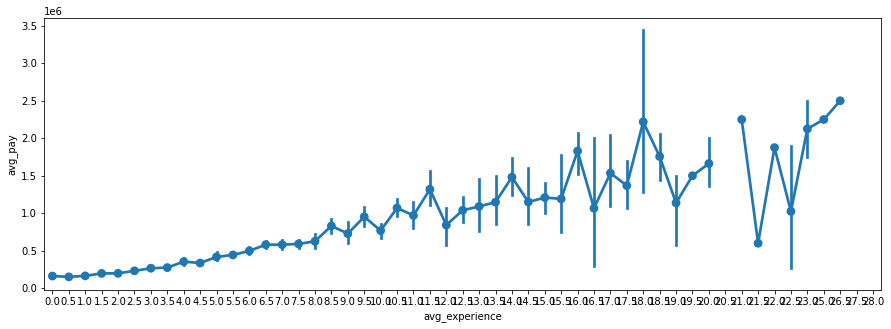

In [37]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='avg_experience', y='avg_pay', data=data)

<AxesSubplot:xlabel='industry'>

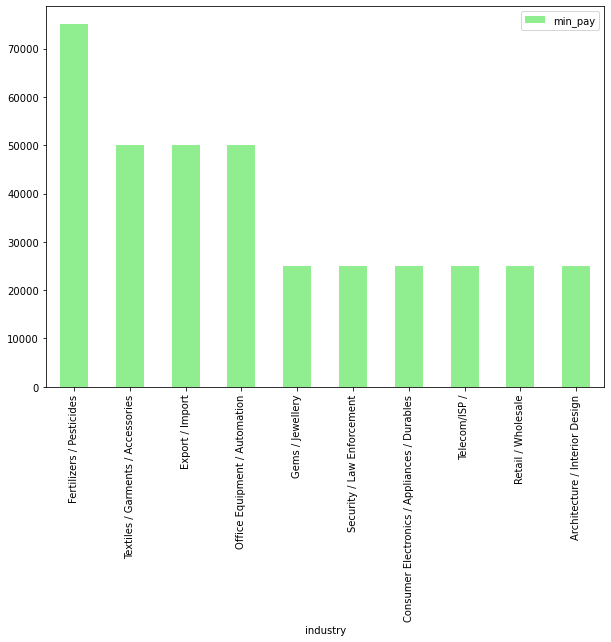

In [38]:

data[['min_pay','industry']].groupby(["industry"]).median().sort_values(by='min_pay',ascending=False).head(10).plot.bar(color='lightgreen')

<AxesSubplot:xlabel='industry'>

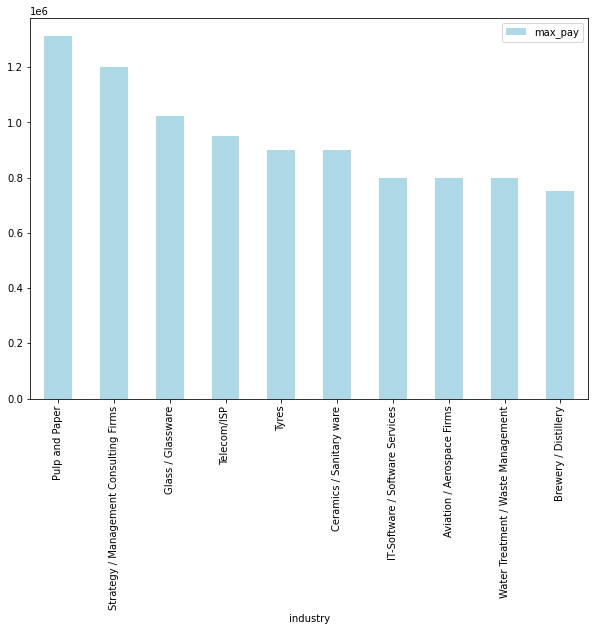

In [39]:
data[['max_pay','industry']].groupby(["industry"]).median().sort_values(by='max_pay',ascending=False).head(10).plot.bar(color='lightblue')

<AxesSubplot:xlabel='skills'>

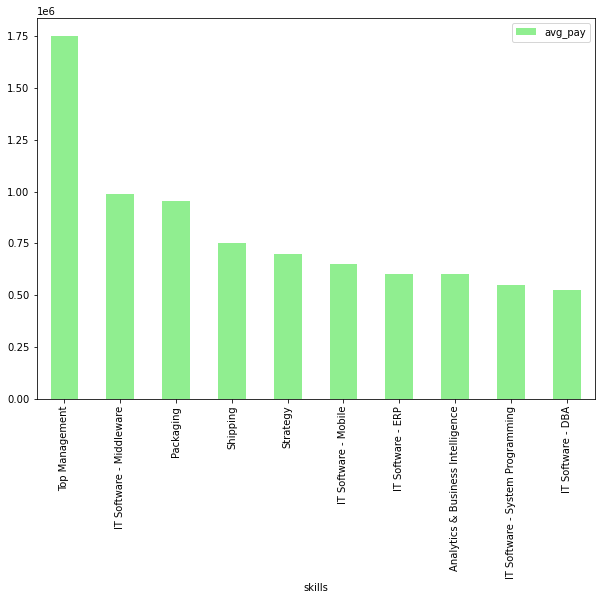

In [40]:
data[['avg_pay','skills']].groupby(["skills"]).median().sort_values(by='avg_pay',ascending=False).head(10).plot.bar(color='lightgreen')

<AxesSubplot:xlabel='jobtitle'>

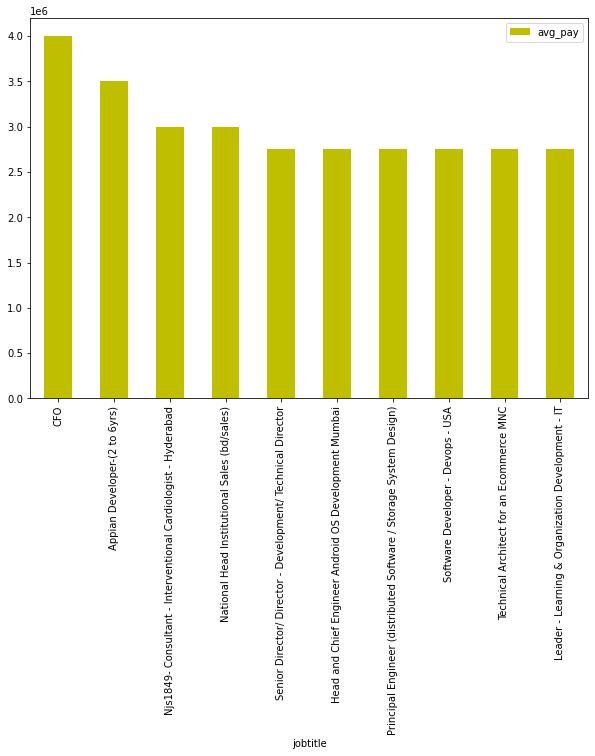

In [41]:
data[['avg_pay','jobtitle']].groupby(["jobtitle"]).median().sort_values(by='avg_pay',ascending=False).head(10).plot.bar(color='y')